Note: you may need to restart the kernel to use updated packages.


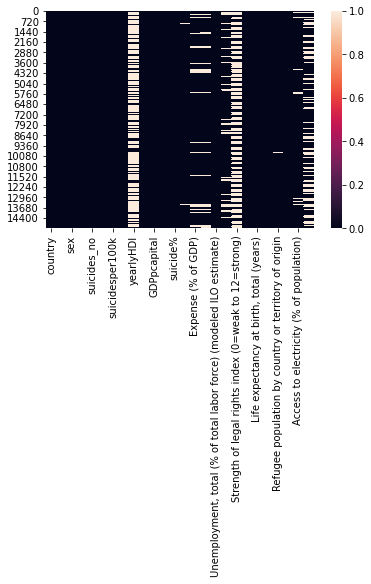

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

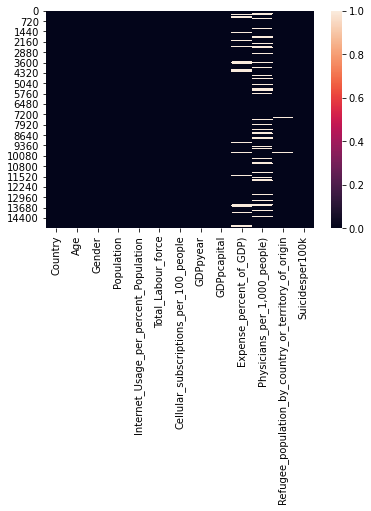

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               15110 non-null  object 
 1   Age                                                   15110 non-null  object 
 2   Gender                                                15110 non-null  object 
 3   Population                                            15110 non-null  int64  
 4   Internet_Usage_per_percent_Population                 15002 non-null  float64
 5   Total_Labour_force                                    15110 non-null  int64  
 6   Cellular_subscriptions_per_100_people                 15110 non-null  float64
 7   GDPpyear                                              15110 non-null  float64
 8   GDPpcapital                                           15

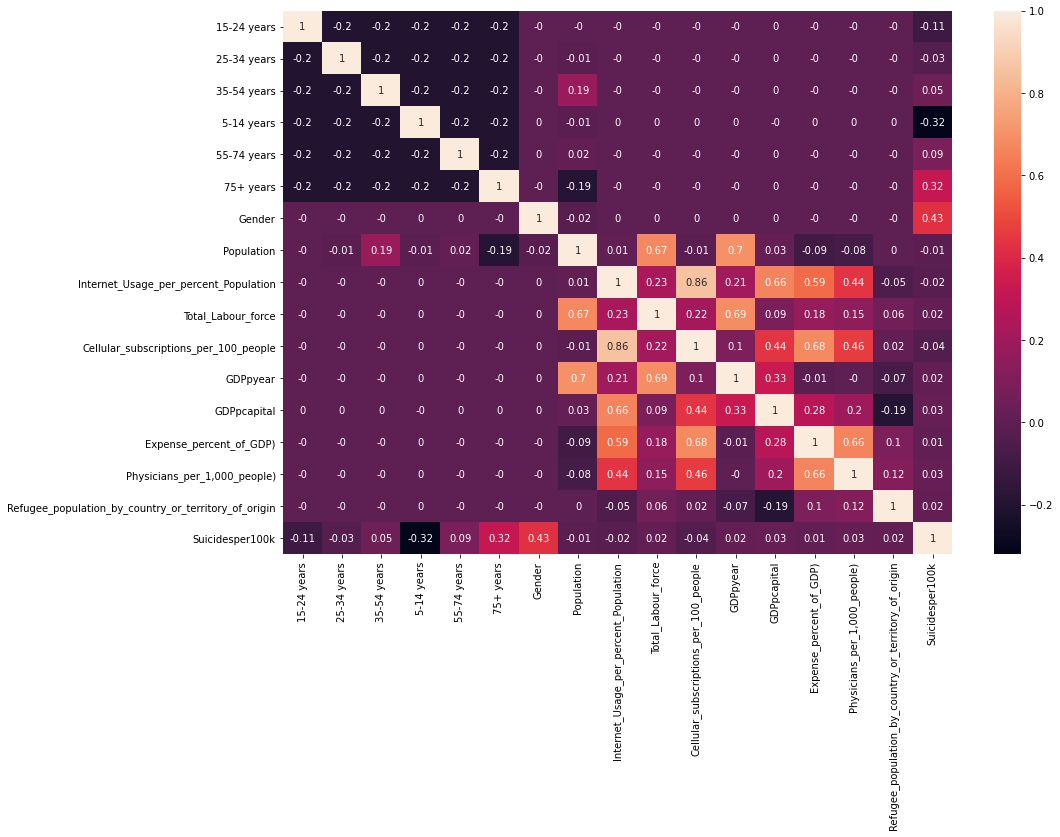

   Argentina  Armenia  Australia  Austria  Azerbaijan  Belgium  Brazil  \
0          1        0          0        0           0        0       0   
1          1        0          0        0           0        0       0   
2          1        0          0        0           0        0       0   
3          1        0          0        0           0        0       0   
4          1        0          0        0           0        0       0   

   Bulgaria  Canada  Chile  ...  Sweden  Switzerland  Thailand  Turkey  \
0         0       0      0  ...       0            0         0       0   
1         0       0      0  ...       0            0         0       0   
2         0       0      0  ...       0            0         0       0   
3         0       0      0  ...       0            0         0       0   
4         0       0      0  ...       0            0         0       0   

   Turkmenistan  Ukraine  United Arab Emirates  United Kingdom  United States  \
0             0        0     

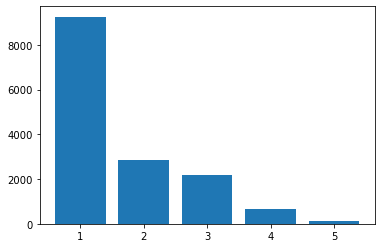

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

In [12]:
%run X_and_y_selection.ipynb  #  importing a .ipynb file

# Function to evaluate different models

In [2]:
def Classifier_function(X_train, y_train, title):  # function takes the type of model, the hyperparameters of the
    # model, the x_train and y_train to get our results.
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.

  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2) * 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)
  
  cReport = classification_report(y_test,y_test_pred)
  print(cReport)
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)


  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100
  precision = round(np.mean(precision),2) * 100
  recall = round(np.mean(recall),2) * 100
  f1_score = round(np.mean(f1_score),2) * 100

  lable_list = []
  flase_negatives = [0]
  for i in range(len(cm)):
    if i > 0:
     flase_negatives.append(0)
    for j in range(len(cm)):

        if j == i:
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+str(round(cm[i][j]/np.sum(cm),2)) + " %")
            flase_negatives[i] = flase_negatives[i] + cm[i][j]
            

  lable_list = np.asarray(lable_list).reshape(len(cm),len(cm))
  

  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " + str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 



  plt.figure(figsize = (12,9))  # sets the size of the matrix
  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')                           
  disp.plot()  # displaying data in plot
  plt.title(title)  # adding a title to plot
  plt.ylabel('True label')
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score)
  plt.show()  # showing the plot
    
  result_list = [accuracy, precision, recall, f1_score]

  

  return result_list

# Function to preform Grid Search

In [3]:
def Grid_search_fun(typeofmodelandprams, dict_prams,para_list, crossval, X, y):

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the grid search
    grid_search = GridSearchCV(estimator = model,  # model
                           param_grid = parameters,  # hyper paramaters 
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, return_train_score=False)  # selecting all possible paramaters to go through to get the best model possible # train score is false as it can be computationaly expensive. without storing the traning score the grd search is fater
    grid_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(grid_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(grid_search.cv_results_)) # to print the whole result

    best_accuracy = grid_search.best_score_  # the best accuracy 
    best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    
    print(parameters)


    return grid_search
    



# Function to preform Random Search

In [4]:
def rand_search_fun(typeofmodelandprams, dict_prams,para_list, crossval, X, y):

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the grid search
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           #n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly expensive. without storing the traning score the grd search is fater
                           n_iter=10,
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(rand_search.cv_results_)) # to print the whole result

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    
    print(parameters)


    return rand_search
    



# Using KNN

## k-fold cross-validation

In [5]:
def linear_plot(xlab, ylab, l1, l2, title,lg ,lg_lc):
    plt.title(title,fontsize=18)
    plt.plot(xlab, ylab)
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.legend([lg], loc=lg_lc)
    plt.grid()

In [6]:
def K_NN_plot(X,y, K_Value_list):
    ave_scores = []
    k_list = K_Value_list
    for k in k_list:
        model = KNeighborsClassifier(n_neighbors = k) 
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")
        ave_scores.append(round(scores.mean(),3))
    print("ave scores ", ave_scores)
    linear_plot(k_list, ave_scores, "Number of nearest neighbours", "Average CV model accuracy", "Best KNN Selection",\
                "KNN", "lower left")


    plt.grid()

In [7]:
def crossvalscore(model, X, y, cv_val):
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val)   # performs 10 different tests to get average accurecy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return ("Accuracy: {:.2f} %".format(score.mean()*100))

# X and y feature Scaled Values

In [ ]:
K_NN_plot(X,y, list(range(1,50)))

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors=50), X, y, 10) #true 0 false 0 

In [9]:
k_list = list(range(1,31))
weight_list = ["uniform", "distance"]
para_grid = dict(n_neighbors=k_list,weights=weight_list)
para_list = [k_list, weight_list]

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.051591      0.036599         2.367200        0.223612   
1        0.029404      0.003881         1.784797        0.079540   
2        0.037803      0.013122         1.898396        0.165771   
3        0.022001      0.001415         1.462201        0.012559   
4        0.024605      0.003979         1.785795        0.127436   
5        0.029804      0.005112         1.846396        0.024125   
6        0.032602      0.007147         1.769797        0.114170   
7        0.025005      0.003519         1.487403        0.029132   
8        0.030200      0.004620         2.284599        0.143450   
9        0.041996      0.012084         2.202402        0.192173   
10       0.050203      0.023511         2.934393        0.044499   
11       0.048402      0.014651         2.530597        0.066561   
12       0.058196      0.018176         2.763199        0.178912   
13       0.034799      0.011856         2.027598

In [ ]:
grid_search = Grid_search_fun(KNeighborsClassifier(n_neighbors=k_list), para_grid, para_list, 5, X, y)

In [52]:
uniform = []
for i in range(0, len(grid_search.cv_results_["mean_test_score"]), 2):

    uniform.append(grid_search.cv_results_["mean_test_score"][i])

In [53]:
distance = []
for i in range(1, len(grid_search.cv_results_["mean_test_score"]), 2):
    distance.append(grid_search.cv_results_["mean_test_score"][i])

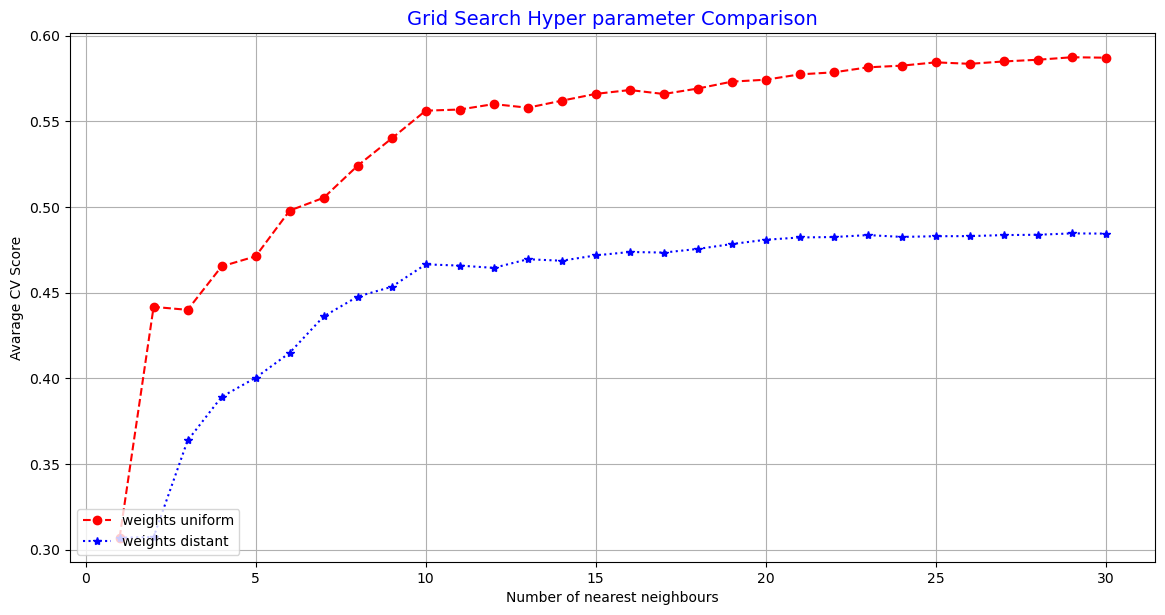

In [54]:
plt.figure(dpi=100, figsize=(14, 7))
plt.title("Grid Search Hyper parameter Comparison",fontsize=14, color="blue")
plt.plot(k_list,uniform , "--", marker = "o", label="weights uniform", color="red")
plt.plot(k_list,distance ,":", marker = "*", label="weights distant", color="blue")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Avarage CV Score")
plt.legend(loc='lower left')
plt.grid()

In [13]:
rand_search = rand_search_fun(KNeighborsClassifier(), para_grid, para_list, 5, X, y)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.004326      0.006109         0.637831        0.014912      distance   
1       0.003127      0.006253         0.745598        0.029737       uniform   
2       0.006207      0.000397         0.791398        0.083742       uniform   
3       0.005400      0.000483         0.727008        0.025829       uniform   
4       0.005997      0.000641         0.735404        0.010209       uniform   
5       0.005800      0.000747         0.629407        0.013885      distance   
6       0.006400      0.001358         0.686994        0.053270      distance   
7       0.005606      0.000492         0.727603        0.017802       uniform   
8       0.005408      0.000488         0.639396        0.010580      distance   
9       0.001000      0.002000         0.746978        0.028166       uniform   

  param_n_neighbors                                      params  \
0                16  {'weights': 'distanc

In [14]:
uniform = []
k_list1 = []
for i in range(len(rand_search.cv_results_["mean_test_score"])):
    if rand_search.cv_results_["param_weights"][i] == "uniform":

        uniform.append(rand_search.cv_results_["mean_test_score"][i])
        k_list1.append(rand_search.cv_results_["param_n_neighbors"][i])

In [15]:
distance = []
k_list2 = []
for i in range(len(rand_search.cv_results_["mean_test_score"])):
    if rand_search.cv_results_["param_weights"][i] == "distance":
        distance.append(rand_search.cv_results_["mean_test_score"][i])
        k_list2.append(rand_search.cv_results_["param_n_neighbors"][i])

In [23]:
sorted_uniform = []
sorted_list1 = k_list1.copy()
sorted_list1.sort() 
for i in range(len(sorted_list1)):
    for j in range(len(k_list1)):
        if sorted_list1[i] == k_list1[j]:
            sorted_uniform.append(uniform[j])

    

In [22]:
sorted_distance = []
sorted_list2 = k_list2.copy()
sorted_list2.sort() 
for i in range(len(sorted_list2)):
    for j in range(len(k_list2)):
        if sorted_list2[i] == k_list2[j]:
            sorted_distance.append(distance[j])

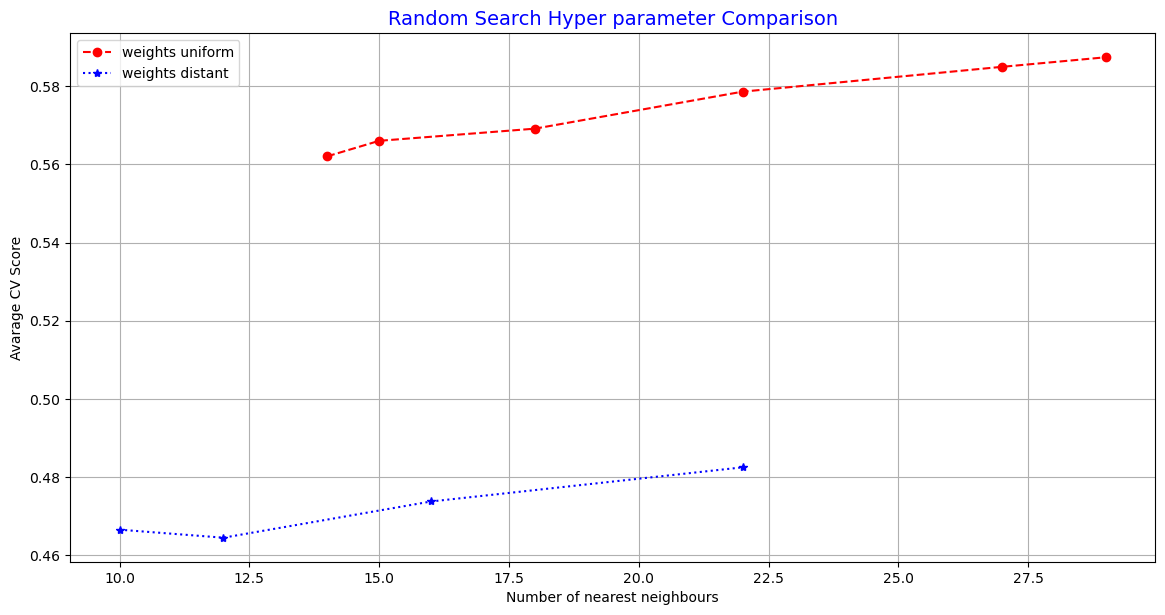

In [21]:
plt.figure(dpi=100, figsize=(14, 7))
plt.title("Random Search Hyper parameter Comparison",fontsize=14, color="blue")
plt.plot(sorted_list1,sorted_uniform , "--",marker = "o", label="weights uniform", color="red")
plt.plot(sorted_list2,sorted_distance , ":",marker = "*", label="weights distant", color="blue")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Avarage CV Score")
plt.legend(loc='upper left')
plt.grid()

  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 2]
 [1 1]
 [4 5]]
Model train accuracy:  78.0 %
Model test accuracy:  76.0 %



              precision    recall  f1-score   support

           1       0.78      0.98      0.87      1838
           2       0.70      0.36      0.47       598
           3       0.71      0.52      0.60       438
           4       0.69      0.34      0.46       119
           5       0.67      0.14      0.23        29

    accuracy                           0.76      3022
   macro avg       0.71      0.47      0.53      3022
weighted avg       0.75      0.76      0.73      3022



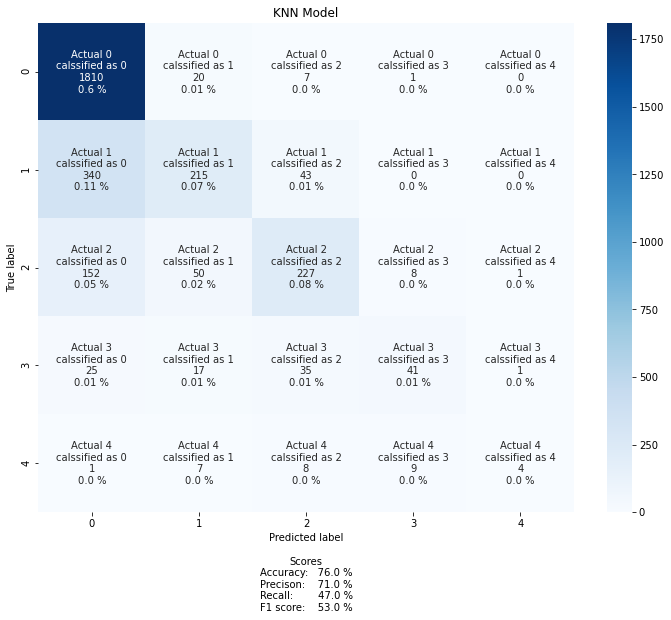

[76.0, 71.0, 47.0, 53.0]

In [50]:
model = KNeighborsClassifier(n_neighbors=29, weights='uniform') # Bulding an object of the class
Classifier_function(X_train, y_train, "KNN Model")

# X and y Un-feature Scaled

  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 2]
 [1 1]
 [1 5]]
Model train accuracy:  61.0 %
Model test accuracy:  61.0 %



              precision    recall  f1-score   support

           1       0.61      1.00      0.76      1838
           2       0.00      0.00      0.00       598
           3       0.00      0.00      0.00       438
           4       0.00      0.00      0.00       119
           5       0.00      0.00      0.00        29

    accuracy                           0.61      3022
   macro avg       0.12      0.20      0.15      3022
weighted avg       0.37      0.61      0.46      3022



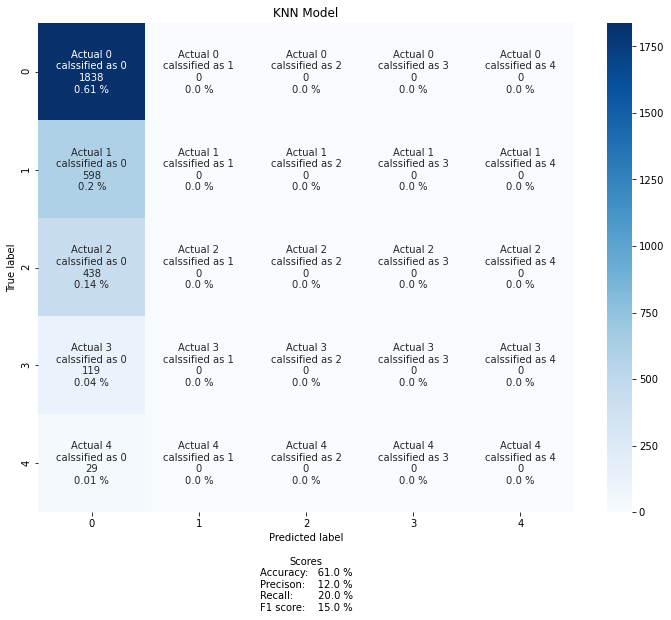

[61.0, 12.0, 20.0, 15.0]

In [48]:
model = KNeighborsClassifier(n_neighbors=50, weights='uniform') # Bulding an object of the class
Classifier_function(UnScaled_X_train, UnScaled_y_train, "KNN Model")

#  After Corelation matrix scaled X and y 

In [ ]:
K_NN_plot(X2,y, list(range(1,50)))

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors=1), X2, y, 15) #true 0 false 0 

In [38]:
model = KNeighborsClassifier(n_neighbors=1) # Bulding an object of the class
Classifier_function(X2_train, y2_train, "KNN Model")

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 64 while Y.shape[1] == 52

# Underfitted X and y

In [ ]:
K_NN_plot(X_under, y_under, list(range(1,50)))

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors=1), X_under, y_under, 15) #true 0 false 0

  results
pred-Actual
[[2 1]
 [2 1]
 [2 1]
 ...
 [2 2]
 [2 1]
 [2 5]]
Model train accuracy:  100.0 %
Model test accuracy:  20.0 %



              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1838
           2       0.20      1.00      0.33       598
           3       0.00      0.00      0.00       438
           4       0.00      0.00      0.00       119
           5       0.00      0.00      0.00        29

    accuracy                           0.20      3022
   macro avg       0.04      0.20      0.07      3022
weighted avg       0.04      0.20      0.07      3022



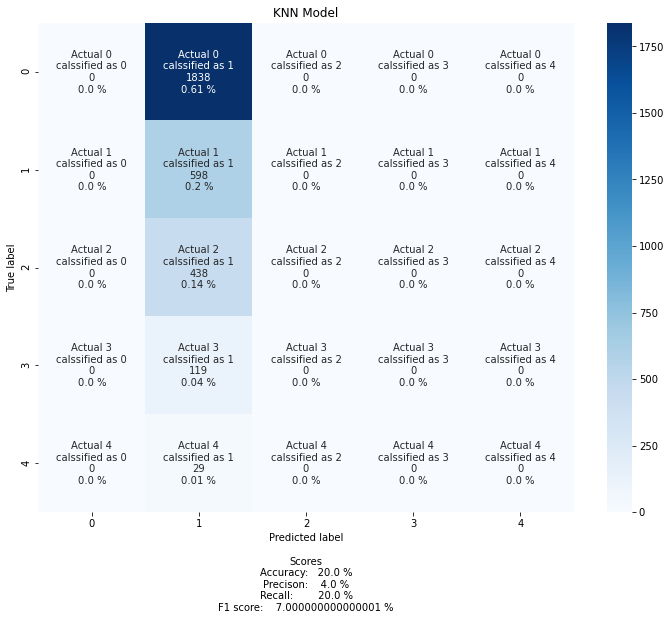

[20.0, 4.0, 20.0, 7.000000000000001]

In [35]:
model = KNeighborsClassifier(n_neighbors=1) # Bulding an object of the class
Classifier_function(X_under, y_under, "KNN Model")

# Over fitted X and y

In [ ]:
K_NN_plot(X_over, y_over, list(range(1,50)))

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors=1), X_over, y_over, 10)

  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 2]
 [1 1]
 [1 5]]
Model train accuracy:  99.0 %
Model test accuracy:  61.0 %



              precision    recall  f1-score   support

           1       0.61      1.00      0.76      1838
           2       0.00      0.00      0.00       598
           3       0.00      0.00      0.00       438
           4       0.00      0.00      0.00       119
           5       0.00      0.00      0.00        29

    accuracy                           0.61      3022
   macro avg       0.12      0.20      0.15      3022
weighted avg       0.37      0.61      0.46      3022



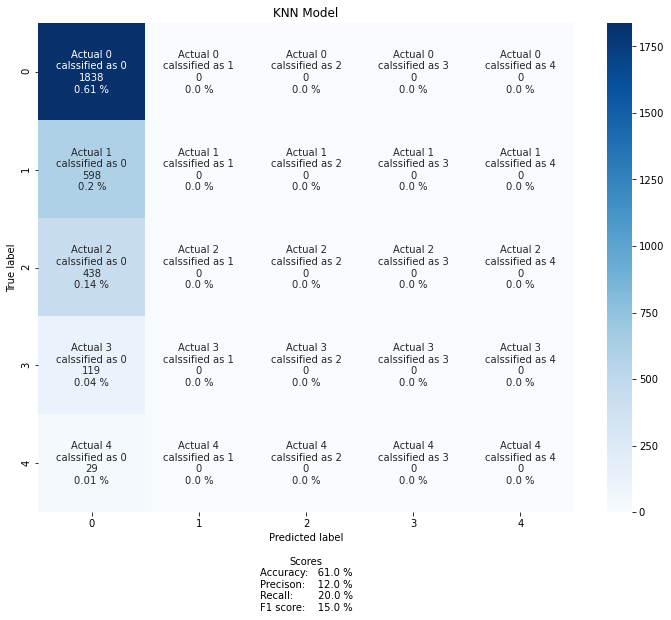

[61.0, 12.0, 20.0, 15.0]

In [36]:
model = KNeighborsClassifier(n_neighbors=1) # Bulding an object of the class
Classifier_function(X_over, y_over, "KNN Model")